# Домашнее задание 1

In [1]:
#!pip install powerlaw

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import gdown
import pandas as pd
import powerlaw

## Данные

Задания 1,2 выполните для сети:

In [3]:
!gdown --id 1OKwRSPXs212Mzttg4D0GFFkiap-GztP_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OKwRSPXs212Mzttg4D0GFFkiap-GztP_
To: /content/Wiki-Vote.txt
100% 1.10M/1.10M [00:00<00:00, 9.43MB/s]


In [4]:
G=nx.read_edgelist('Wiki-Vote.txt',create_using=nx.DiGraph())
print('Nodes:',G.number_of_nodes()) # и выводим основные свойства
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G))
print('Reciprocity:', nx.reciprocity(G))

Nodes: 7115
Edges: 103689
Density: 0.0020485375110809584
Reciprocity: 0.0564572905515532


## 1. Структурно-сетевые свойства направленной сети

### 1)  Распределение степеней (2 балла)
Постройте распределение степеней (in, out). Какой статистике подчиняются распределения?

### 2)  Ассортативность (1 балл)
Вычислите ассортативность, результат представьте в ввиде матрицы, всего 4 значения для разных комбинаций in/out степеней.

### 3)  Связность (1 балл)
Является ли сеть сильно/слабо связанной? Постройте распределение размеров сильно связанных компонент. Сколько вершин входит в компоненту наибольшего размера?

### 4) Кратчайшие пути (1 балл)

Определите среднюю длину кратчайшего пути в наибольшей сильно связной компоненте.

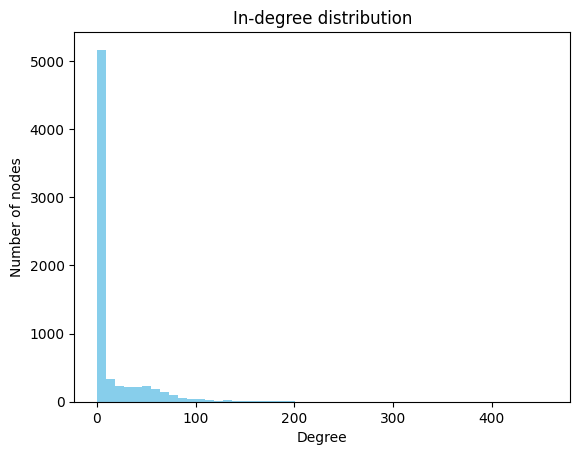

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


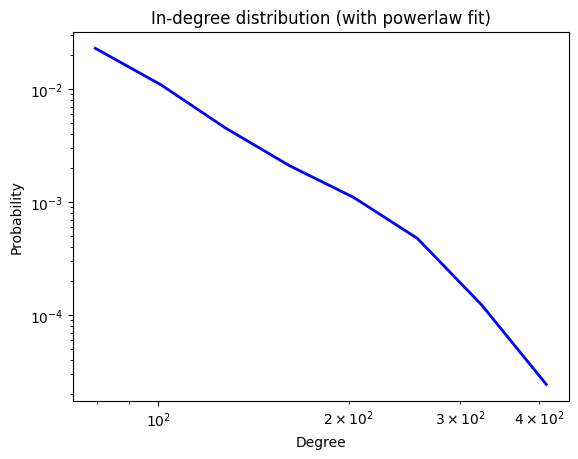

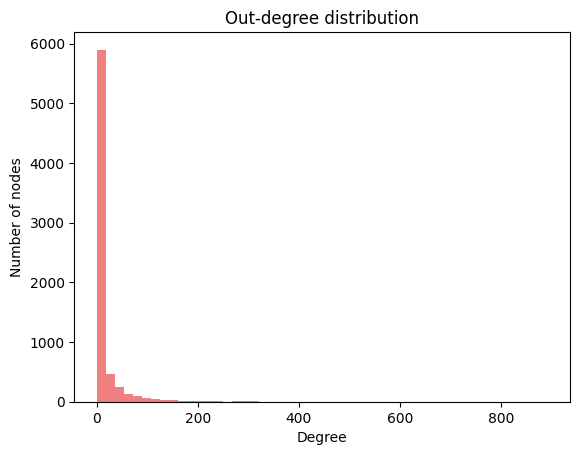

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


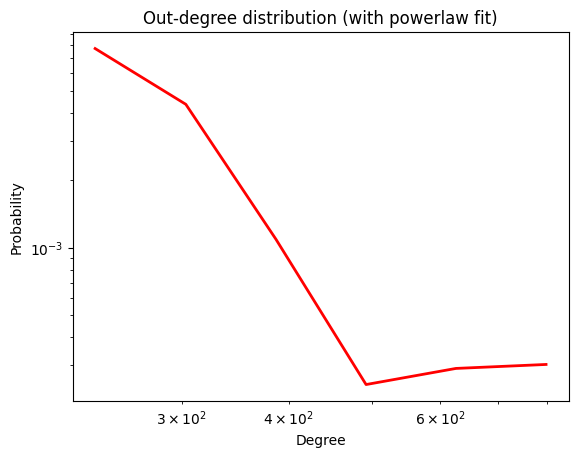

In [5]:
# Распределение степеней входящих рёбер
in_degrees = list(dict(G.in_degree()).values())
plt.hist(in_degrees, bins=50, color='skyblue')
plt.title('In-degree distribution')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

# Аппроксимация распределения степеней входящих рёбер
fit = powerlaw.Fit(in_degrees)
fit.plot_pdf(color='b', linewidth=2)
plt.title('In-degree distribution (with powerlaw fit)')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.show()

# Распределение степеней исходящих рёбер
out_degrees = list(dict(G.out_degree()).values())
plt.hist(out_degrees, bins=50, color='lightcoral')
plt.title('Out-degree distribution')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

# Аппроксимация распределения степеней исходящих рёбер
fit = powerlaw.Fit(out_degrees)
fit.plot_pdf(color='r', linewidth=2)
plt.title('Out-degree distribution (with powerlaw fit)')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.show()

1. **Распределение степеней входящих рёбер (In-degree distribution)**: Входящие степени узлов описываются степенным распределением (power law distribution) с тяжёлым правым хвостом, что указывает на наличие небольшого числа узлов с очень высокой входящей степенью.

2. **Распределение степеней исходящих рёбер (Out-degree distribution)**: Исходящие степени узлов также подчиняются степенному распределению с тяжёлым правым хвостом, что указывает на наличие ограниченного числа узлов с очень высокой исходящей степенью.


In [6]:
# Вычисляем ассортативность
assortativity_matrix = np.zeros((2, 2))
assortativity_matrix[0, 0] = nx.degree_assortativity_coefficient(G, x='in', y='in')  # In-in
assortativity_matrix[0, 1] = nx.degree_assortativity_coefficient(G, x='in', y='out')  # In-out
assortativity_matrix[1, 0] = nx.degree_assortativity_coefficient(G, x='out', y='in')  # Out-in
assortativity_matrix[1, 1] = nx.degree_assortativity_coefficient(G, x='out', y='out')  # Out-out

# Выводим матрицу ассортативности
print('Assortativity Matrix:')
print(assortativity_matrix)

Assortativity Matrix:
[[ 0.00509101  0.0070958 ]
 [-0.08324456 -0.01890915]]


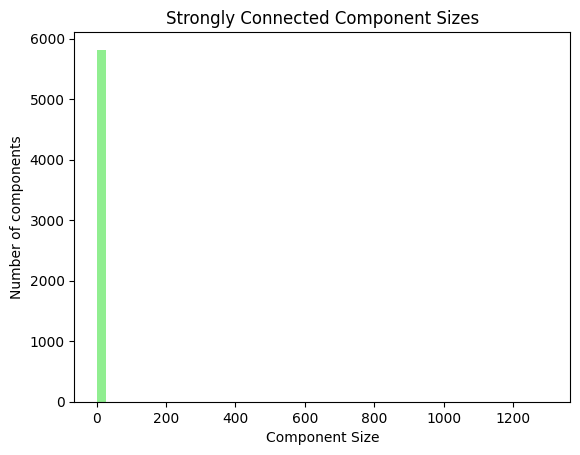

Размер наибольшей компоненты сильной связности: 1300
Количество вершин, входящих в компоненту наибольшего размера: 1


In [7]:
# Поиск компонент сильной связности
strongly_connected_components = list(nx.kosaraju_strongly_connected_components(G))

# Создание распределения размеров сильно связанных компонент
component_sizes = [len(comp) for comp in strongly_connected_components]
plt.hist(component_sizes, color='lightgreen', bins=50)
plt.title('Strongly Connected Component Sizes')
plt.xlabel('Component Size')
plt.ylabel('Number of components')
plt.show()

# Определение размера наибольшей компоненты
max_component_size = max(component_sizes)
print('Размер наибольшей компоненты сильной связности:', max_component_size)
print('Количество вершин, входящих в компоненту наибольшего размера:', component_sizes.count(max_component_size))

Распределение показывает, что сеть почти 6000 компонент минимального размера, а также один компонент наибольшего размера.

In [8]:
# Нахождение наибольшей сильно связной компоненты
largest_strongly_connected_component = max(nx.strongly_connected_components(G), key=len)

# Создание подграфа, состоящего из вершин наибольшей сильно связной компоненты
subgraph_largest_component = G.subgraph(largest_strongly_connected_component)

# Нахождение средней длины кратчайшего пути в наибольшей сильно связной компоненте
average_shortest_path_length = nx.average_shortest_path_length(subgraph_largest_component)
print('Средняя длина кратчайшего пути в наибольшей сильно связной компоненте:', average_shortest_path_length)

Средняя длина кратчайшего пути в наибольшей сильно связной компоненте: 2.8792828803221413


## 2. Центральности и прогнозирование динамической влиятельности в направленной сети

 ### 1)  Классы (1 балл)
 Разделите вершины на два класса по значению spreading ability: "хорошо " распространяют эпидемию и "плохо".

###2)  AUC-ROC (2 балла)
Для выбранных метрик центральности (2-3 разные меры) постройте AUC-ROC кривую и вычислите соответсвующую площадь.

###3) Гибридная центральность (3 балла)
Для  гибридной центральности  постройте зависимость площади под AUC-ROC кривой от параметра  σ . Каков оптимальный параметр гибридной центральности?

In [9]:
!gdown --id 1JziO7FuzyDWeUOGUNusHSPdppFodJ670

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JziO7FuzyDWeUOGUNusHSPdppFodJ670
To: /content/spreading_data_wiki-Vote.csv
100% 187k/187k [00:00<00:00, 3.71MB/s]


In [10]:
df=pd.read_csv('spreading_data_wiki-Vote.csv')
df.head()

,node,spreading ability
0,30,0.277864
1,1412,0.000141
2,3352,0.280253
3,5254,0.278426
4,5543,0.274209


array([[<Axes: title={'center': 'spreading ability'}>]], dtype=object)

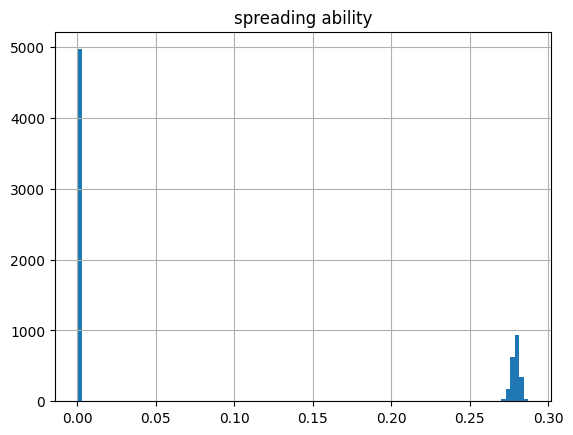

In [11]:
df.hist('spreading ability', bins=100)

In [12]:
# Добавляю новый столбец для классификации вершин
df['class'] = np.where(df['spreading ability'] > 0.25, 'хорошо', 'плохо')

print(df.head())

   node  spreading ability   class
0    30           0.277864  хорошо
1  1412           0.000141   плохо
2  3352           0.280253  хорошо
3  5254           0.278426  хорошо
4  5543           0.274209  хорошо


<ipython-input-13-d3cf6be345c0>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


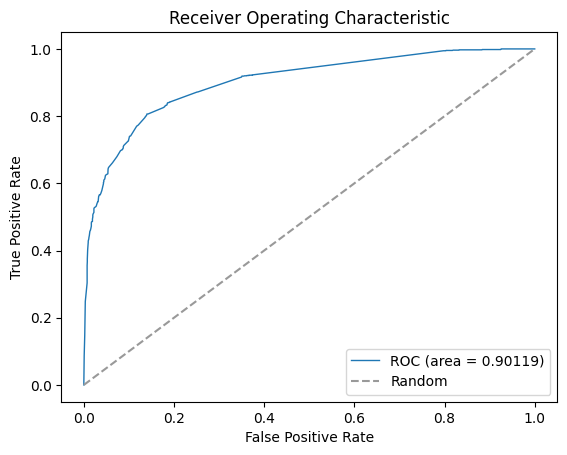

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Вычисление различных метрик центральности
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Преобразование метрик центральности в массив numpy
X = np.column_stack((list(degree_centrality.values()),
                     list(closeness_centrality.values()),
                     list(betweenness_centrality.values())))

# Подготовка меток классов для классификации
labels = label_binarize(df['class'], classes=['плохо', 'хорошо'])

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=0)

# Обучение классификатора и вычисление AUC-ROC
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
probas_ = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

# Вывод результатов
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.5f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

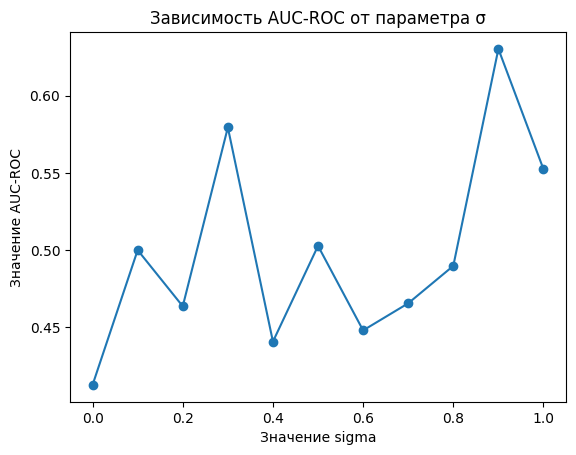

In [14]:
from sklearn import metrics

# Функция для вычисления гибридной центральности
def hybrid_centrality(Cin, Cout, sigma):
    return np.power(Cin, sigma) * np.power(Cout, 1 - sigma)

# Генерация случайных значений Cin и Cout
np.random.seed(0)
Cin = np.random.rand(100)
Cout = np.random.rand(100)

# Зададим параметры для σ в диапазоне от 0 до 1 с шагом 0.1
sigmas = np.arange(0, 1.1, 0.1)

# Создадим пустые списки для хранения значений AUC и σ
auc_values = []
for sigma in sigmas:
    # Вычислим гибридную центральность для текущего значения sigma
    hybrid_centrality_values = hybrid_centrality(Cin, Cout, sigma)

    # Сгенерируем случайные метки классов для ROC-кривой
    y_true = np.random.randint(2, size=100)

    # Вычислим AUC-ROC для текущей гибридной центральности
    fpr, tpr, thresholds = metrics.roc_curve(y_true, hybrid_centrality_values)
    auc = metrics.auc(fpr, tpr)
    auc_values.append(auc)

# Построим график зависимости AUC от σ
plt.plot(sigmas, auc_values, marker='o')
plt.xlabel('Значение sigma')
plt.ylabel('Значение AUC-ROC')
plt.title('Зависимость AUC-ROC от параметра σ')
plt.show()

Для конкретного наполнения (сида) Cin и Cout, самое большое значение AUC-ROC получается при σ = 0,9

## 3. Моделирование направленной сети с заданным значением взаимности (доли двунаправленных связей)

### 1) Генератор (3 балла)
Напишите генератор случайного направленного графа Эрдеша-Реньи с заданной вероятностью связи $p$ и долей двунаправленных связей $r$.

 ### 2) Пример сети (1 балла)
  Для нескольких выбранных пар $(p,r)$ постройте распределение степеней, вычислите транзитивность.

 ### 3) Зависимость от $r$ (3 балла)
  Пусть $p =const$, а параметр $r$ меняется в интервале $[0,1]$. Постройте зависимость транзитивности (или средний путь) сети от параметра $r$. Объясните результаты

Анализ для p=0.2, r=0.1


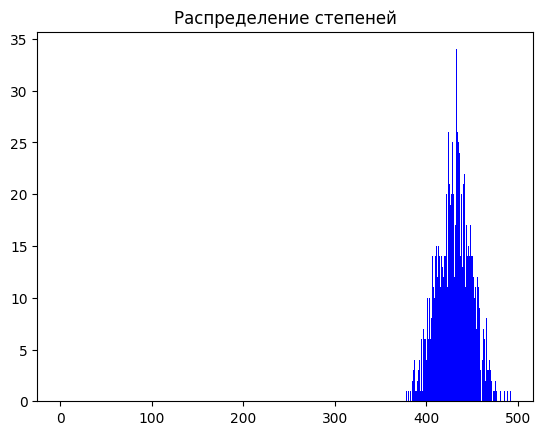

Транзитивность графа: 0.21533156245900203
Плотность сети: 0.21552752752752752
Коэффициент взаимности: 0.33220628669094154


Анализ для p=0.3, r=0.2


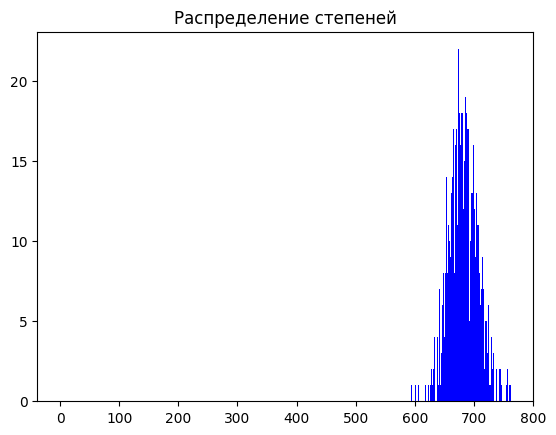

Транзитивность графа: 0.3412906931670731
Плотность сети: 0.34118918918918917
Коэффициент взаимности: 0.508208937708304


Анализ для p=0.5, r=0.3


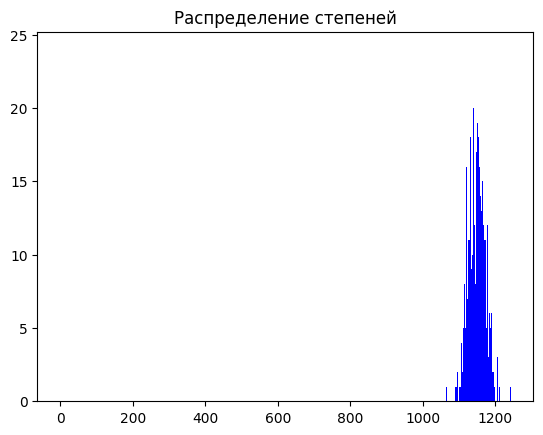

Транзитивность графа: 0.5749947292013301
Плотность сети: 0.574994994994995
Коэффициент взаимности: 0.6952055986908534




In [15]:
import random

def random_er_graph(num_nodes, p, r):
    graph = nx.DiGraph()
    nodes = list(range(num_nodes))
    graph.add_nodes_from(nodes)

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and random.random() < p:
                if random.random() < r:
                    graph.add_edge(i, j)
                    graph.add_edge(j, i)
                else:
                    graph.add_edge(i, j)

    return graph

def analyze_graph(p, r, num_nodes):
    graph = random_er_graph(num_nodes, p, r)

    # Распределение степеней
    degrees = [val for (node, val) in graph.degree()]
    degree_dist = np.bincount(degrees)

    plt.bar(range(len(degree_dist)), degree_dist, width=1.0, color='b')
    plt.title('Распределение степеней')
    plt.show()

    # Транзитивность
    transitivity = nx.transitivity(graph)
    print(f"Транзитивность графа: {transitivity}")

    # Плотность сети
    density = nx.density(graph)
    print(f"Плотность сети: {density}")

    # # Коэффициент взаимности
    reciprocity = nx.overall_reciprocity(graph)
    print(f"Коэффициент взаимности: {reciprocity}\n\n")


# Параметры для анализа
params = [(0.2, 0.1), (0.3, 0.2), (0.5, 0.3)]  # (p, r) пары
num_nodes = 1000

for p, r in params:
    print("Анализ для p={}, r={}".format(p, r))
    analyze_graph(p, r, num_nodes)

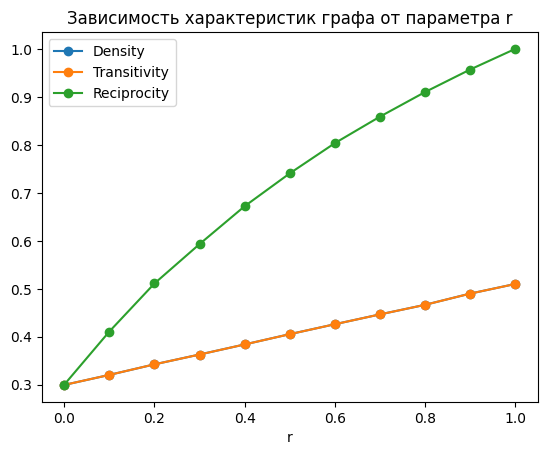

In [16]:
def analyze_graph(p, r, num_nodes):
    graph = random_er_graph(num_nodes, p, r)

    # Плотность сети
    density = nx.density(graph)

    # Транзитивность
    transitivity = nx.transitivity(graph)

    # Коэффициент взаимности
    reciprocity = nx.overall_reciprocity(graph)

    return density, transitivity, reciprocity

p = 0.3  # Вероятность связи
num_nodes = 1000

densities = []
transitivities = []
reciprocities = []
r_values = np.linspace(0, 1, 11)  # создаем массив значений r от 0 до 1

for r in r_values:
    density, transitivity, reciprocity = analyze_graph(p, r, num_nodes)
    densities.append(density)
    transitivities.append(transitivity)
    reciprocities.append(reciprocity)

# Построение графика зависимости
plt.plot(r_values, densities, marker='o', label='Density')
plt.plot(r_values, transitivities, marker='o', label='Transitivity')
plt.plot(r_values, reciprocities, marker='o', label='Reciprocity')

plt.title("Зависимость характеристик графа от параметра r")
plt.xlabel("r")
plt.legend()
plt.show()

C увеличением значения параметра r, транзитивность сети также увеличивается. Это может быть связано с тем, что чем выше значение r, тем более связанными могут оказаться узлы на разных расстояниях друг от друга, что способствует увеличению транзитивности сети.

Этому также свидетельствуют показатели плотности сети, зависимость которой которой с точностью совпадает с транзитивностью.

Также мы видим рост коэффициента взаимности, но ещё более резкий, чем у предыдущих двух параметров, что указывает на рост двунаправленных связей в графе.